# PREDICTING THE PRICE OF USED CARS
## Day 17 of 110 Days of Machine Learning Challenge

### Project by Anjolaoluwa (Data Princess)

![Used cars animation](https://us.123rf.com/450wm/artinspiring/artinspiring1705/artinspiring170500572/78615533-used-cars-store.jpg)



## Scenario:

Just as most businesses operate, Mr. Walter deals with buying and selling of used cars and has employed you to help optimize his business by predicting the resale price of the cars he acquires. As the automotive market is highly dynamic and influenced by various factors, having accurate price predictions will enable Mr. Walter to make well-informed decisions, maximize profits, and offer competitive prices to customers.

## Project Idea:

Using historical data on used cars, you're to build a predictive model for the selling price. The model will take into account car attributes such as make, model, year of manufacture, mileage, condition, and various technical specifications (as per your discretion/ approach)

# USED CAR RESALE PRICE PREDICTION

Hello! And welcome to my notebook.

I'm Anjolaoluwa Ajayi (AKA Data Princess). Today, we'll be working on an interesting project about predicting the resale price of a used car.

## Approach:

- Data Collection
- Data Preprocessing
- Exploratory Data Analysis (EDA)
- Feature Engineering
- Model Selection
- Model Evaluation

In [ ]:
# For data wrangling
import numpy as np
import pandas as pd

# For preprocessing
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# For selection
from sklearn.model_selection import train_test_split

# For visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# For training & testing
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# For evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
# Loading the data into the notebook
df = pd.read_csv('/content/car details v4.csv')
df.shape

(2059, 20)

Our dataset has 2059 rows and 20 columns

#Data Preprocessing

First, we'll check for missing values



In [ ]:
df.isnull().sum()

Make                    0
Model                   0
Price                   0
Year                    0
Kilometer               0
Fuel Type               0
Transmission            0
Location                0
Color                   0
Owner                   0
Seller Type             0
Engine                 80
Max Power              80
Max Torque             80
Drivetrain            136
Length                 64
Width                  64
Height                 64
Seating Capacity       64
Fuel Tank Capacity    113
dtype: int64

Wow, we've got some cleaning to do!

Let's understand the data further to clean it in the best way possible.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2059 entries, 0 to 2058
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Make                2059 non-null   object 
 1   Model               2059 non-null   object 
 2   Price               2059 non-null   int64  
 3   Year                2059 non-null   int64  
 4   Kilometer           2059 non-null   int64  
 5   Fuel Type           2059 non-null   object 
 6   Transmission        2059 non-null   object 
 7   Location            2059 non-null   object 
 8   Color               2059 non-null   object 
 9   Owner               2059 non-null   object 
 10  Seller Type         2059 non-null   object 
 11  Engine              1979 non-null   object 
 12  Max Power           1979 non-null   object 
 13  Max Torque          1979 non-null   object 
 14  Drivetrain          1923 non-null   object 
 15  Length              1995 non-null   float64
 16  Width 

It appears we have 4 non-numerical columns and 5 numerical columns that contain null values.

Let's explore further to see if these non-numerical columns are categorical/ ordinal or not

In [ ]:
df.nunique()

Make                    33
Model                 1050
Price                  619
Year                    22
Kilometer              847
Fuel Type                9
Transmission             2
Location                77
Color                   17
Owner                    6
Seller Type              3
Engine                 108
Max Power              335
Max Torque             290
Drivetrain               3
Length                 248
Width                  170
Height                 196
Seating Capacity         6
Fuel Tank Capacity      55
dtype: int64

In [ ]:
df.iloc[: , 11:].head()

,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,1198 cc,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.0
1,1248 cc,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995.0,1695.0,1555.0,5.0,42.0
2,1197 cc,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3585.0,1595.0,1550.0,5.0,35.0
3,1197 cc,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,FWD,3995.0,1745.0,1510.0,5.0,37.0
4,2393 cc,148 bhp @ 3400 rpm,343 Nm @ 1400 rpm,RWD,4735.0,1830.0,1795.0,7.0,55.0


It seems like drivetrain is the only categorical data among the four non numerical columns with missing values.

Engine, max power, and max torque columns can however be converted to numerical columns.

So let's convert them, shall we?

In [ ]:
# Creating new columns 'torque' and 'rotational speed' by extracting numerical values
extracted_values = df['Max Torque'].str.extract(r'(\d+\.?\d*) Nm @ (\d+\.?\d*) rpm')

# Converting the extracted values to numeric types (float for torque, float for rotational speed)
df['torque'] = pd.to_numeric(extracted_values[0], errors='coerce')
df['rotational speed'] = pd.to_numeric(extracted_values[1], errors='coerce').astype('float64')
# Use 'Int64' to handle missing integer values

# Dropping the Max Torque column
df.drop('Max Torque', axis=1, inplace=True)

df[['torque', 'rotational speed']].head()

,torque,rotational speed
0,109.0000,4500.0
1,190.0000,2000.0
2,112.7619,4000.0
3,113.0000,4200.0
4,343.0000,1400.0


In [ ]:
# Doing the same for Max Power

# Creating new columns 'power' and 'rotational_speed' by extracting numerical values
extracted_valuess = df['Max Power'].str.extract(r'(\d+\.?\d*) bhp @ (\d+\.?\d*) rpm')

# Converting the extracted values to numeric types just as done with the power torque
df['power'] = pd.to_numeric(extracted_valuess[0], errors='coerce')
df['rotational_speed'] = pd.to_numeric(extracted_valuess[1], errors='coerce')

# Dropping the Max Power column
df.drop('Max Power', axis=1, inplace=True)

df[['power', 'rotational_speed']].head()

,power,rotational_speed
0,87.0,6000.0
1,74.0,4000.0
2,79.0,6000.0
3,82.0,6000.0
4,148.0,3400.0


In [ ]:
df.shape

(2059, 22)

In [ ]:
# Converting Engine column to numerical data
df['Engine'] = pd.to_numeric(df['Engine'].str.replace(' cc', ''), errors='coerce').astype('float64')
df['Engine'].head()

0    1198.0
1    1248.0
2    1197.0
3    1197.0
4    2393.0
Name: Engine, dtype: float64

Okay! We've converted all the non categorical non numerical columns with missing values to numerical data.

Now, we'll drop all the rows with null values in the drivetrain column and fill all the null values in the other numerical columns with their mean values.

In [ ]:
df.shape

(2059, 22)

In [ ]:
# # dropping rows with missing values
df.dropna(subset=['Drivetrain', 'Engine', 'Fuel Tank Capacity', 'torque', 'rotational speed', 'power', 'rotational_speed'], inplace=True)
print(df.shape)
df.isnull().sum()

(1802, 22)


Make                  0
Model                 0
Price                 0
Year                  0
Kilometer             0
Fuel Type             0
Transmission          0
Location              0
Color                 0
Owner                 0
Seller Type           0
Engine                0
Drivetrain            0
Length                0
Width                 0
Height                0
Seating Capacity      0
Fuel Tank Capacity    0
torque                0
rotational speed      0
power                 0
rotational_speed      0
dtype: int64

Yay! That was successful

## Exploratory Data Analysis (EDA)

Here, we're going to understand how each of the features affects the price of the used cars to optimize our selection for training

In [ ]:
# Summary Statistics
print("Summary Statistics:")
print(df.describe())

Summary Statistics:
              Price         Year     Kilometer       Engine       Length  \
count  1.802000e+03  1802.000000  1.802000e+03  1802.000000  1802.000000   
mean   1.759515e+06  2016.969478  5.200916e+04  1678.322420  4283.273585   
std    2.457563e+06     2.871225  5.930951e+04   630.262203   434.197783   
min    1.410000e+05  1988.000000  0.000000e+00   793.000000  3395.000000   
25%    5.250000e+05  2015.000000  2.800000e+04  1197.000000  3985.000000   
50%    8.625000e+05  2017.000000  4.800000e+04  1498.000000  4357.000000   
75%    1.950000e+06  2019.000000  6.950000e+04  1995.000000  4620.000000   
max    3.500000e+07  2022.000000  2.000000e+06  6592.000000  5569.000000   

             Width       Height  Seating Capacity  Fuel Tank Capacity  \
count  1802.000000  1802.000000       1802.000000         1802.000000   
mean   1769.886792  1589.879023          5.301332           52.203274   
std     131.575637   134.221211          0.809911           15.034851   
min

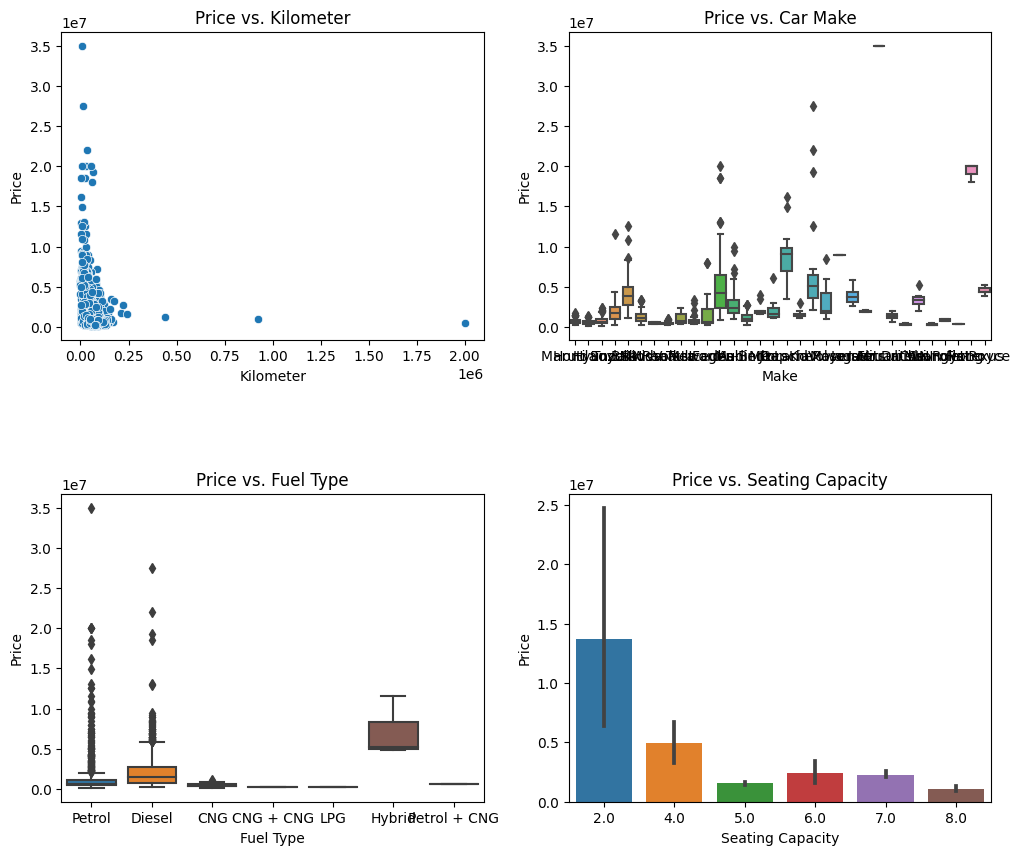

In [ ]:
# Setting up the figure and axis for subplot
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
plt.subplots_adjust(hspace=0.5)

# Plot 1: Price vs. Kilometer
sns.scatterplot(x='Kilometer', y='Price', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Price vs. Kilometer')

# Plot 2: Price vs. Car Make
sns.boxplot(x='Make', y='Price', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Price vs. Car Make')

# Plot 3: Price vs. Fuel Type
sns.boxplot(x='Fuel Type', y='Price', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Price vs. Fuel Type')

# Plot 4: Price vs. Seating Capacity
sns.barplot(x='Seating Capacity', y='Price', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Price vs. Seating Capacity')

# Display the plots
plt.show()

In [ ]:
df['Dimension'] = df['Length'] * df['Width'] * df['Height']

# Analysis the relationship between price and year and dimension
fig = make_subplots(rows=4, cols=2, subplot_titles=("Year vs Price", "Dimensions vs Price", "Fuel tank capacity vs price", "Torque vs Price", "Torque rotational speed vs price", "Power vs Price", "Power vs rotational speed vs Price", "Engine vs Price"))

# Plot 1: Year vs. Price by Make
fig.add_trace(go.Scatter(x=df['Year'], y=df['Price'], mode='markers', marker=dict(color='blue'), name='Year'), row=1, col=1)

# Plot 2: Dimensions vs. Price by Seating Capacity
fig.add_trace(go.Scatter(x=df['Dimension'], y=df['Price'], mode='markers', marker=dict(color='rosybrown'), name='Dimensions'), row=1, col=2)

# Plot 3: Fuel Tank Capacity vs. Price
fig.add_trace(go.Scatter(x=df['Fuel Tank Capacity'], y=df['Price'], mode='markers', marker=dict(color='gold'), name='Fuel Tank Capacity'), row=2, col=1)

# Plot 4: Torque vs. Price
fig.add_trace(go.Scatter(x=df['torque'], y=df['Price'], mode='markers', marker=dict(color='green'), name='torque'), row=2, col=2)

# Plot 5: Torque Rotaional Speed vs. Price
fig.add_trace(go.Scatter(x=df['rotational speed'], y=df['Price'], mode='markers', marker=dict(color='magenta'),  name='rotational speed'), row=3, col=1)

# Plot 6: Power vs. Price
fig.add_trace(go.Scatter(x=df['power'], y=df['Price'], mode='markers', marker=dict(color='orange'), name='power'), row=3, col=2)

# Plot 7: Power Rotational Speed vs. Price
fig.add_trace(go.Scatter(x=df['rotational_speed'], y=df['Price'], mode='markers', marker=dict(color='cyan'), name='rotational_speed'), row=4, col=1)

# Plot 8: Engine vs. Price
fig.add_trace(go.Scatter(x=df['Engine'], y=df['Price'], mode='markers', marker=dict(color='pink'), name='Engine'), row=4, col=2)

# Update subplot size
fig.update_layout(height=1500, width=1000)

# Show the plot
fig.show()

In [ ]:
# Analysis the relationship between price and categorical features
fig = make_subplots(rows=2, cols=2, subplot_titles=("Owner vs. Price", "Transmission vs. Price", "Color vs. Price", "Seller Type vs. Mean Price"))

# Plot 1: Owner vs. Price
fig.add_trace(go.Scatter(x=df['Owner'], y=df['Price'], mode='markers', marker=dict(color='blue'), name='Owner'), row=1, col=1)

# Plot 2: Transmission vs. Price
fig.add_trace(go.Box(x=df['Transmission'], y=df['Price'], name='Transmission'), row=1, col=2)

# Plot 3: Color vs. Price
fig.add_trace(go.Box(x=df['Color'], y=df['Price'], name='Color'), row=2, col=1)

# Plot 4: Seller Type vs. Mean Price

# Calculate the mean price for each 'Seller Type'
mean_prices = df.groupby('Seller Type')['Price'].mean()

# Add bar trace for 'Seller Type' vs. mean price
bar_trace = go.Bar(x=mean_prices.index, y=mean_prices.values, marker=dict(color='green'), name='Seller Type')
fig.add_trace(bar_trace, row=2, col=2)
# fig.add_trace(go.Bar(x=df['Seller Type'], y=df['Price'].mean(), marker=dict(color='green'), name='Seller Type'), row=2, col=2)

# Update layout and titles
fig.update_layout(title_text="Features vs. Price Subplots", showlegend=False)

# Show the plot
fig.show()


With a few exceptions, we can see that there's a positive corellation between the year and the price

We also observe that as the years go on, some car makes remain more expensive than others. So the car make may also affect the price of the car.

Generally, corporate sellers charge more,

## Feature Engineering

In [ ]:
# df.nunique()
# df.columns
df.info()

In [ ]:
cat_val = ['Transmission', 'Fuel Type', 'Color', 'Owner', 'Drivetrain', 'Seller Type']
nonnum_val = ['Make', 'Model', 'Location']

# Label Encoding
label_encoder = LabelEncoder()
for column in cat_val:
    df[column] = label_encoder.fit_transform(df[column])

# One-Hot Encoding
df = pd.get_dummies(df, columns=nonnum_val)

Creating a new column age based on the year of the model

In [ ]:
df['Age'] = 2023 - df['Year']
df['Dimension'] = df['Length'] * df['Width'] * df['Height']

In [ ]:
df.shape

In [ ]:
features = ['Age', 'Dimension', 'Kilometer',  'Engine', 'Drivetrain', 'Length', 'Width', 'Height', 'Seating Capacity', 'Fuel Tank Capacity']
# X = df[features]
X = df.drop(columns=['Price'])
y = df['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#Model 1 - Decision Tree

In [ ]:
# Fitting
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

# Testing
y_pred = model.predict(X_test)

# Evaluating
r2 = r2_score(y_test, y_pred)
print(r2)


# Model 2 - Random Forest

In [ ]:
# Fitting
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Testing
y_pred = model.predict(X_test)

# Evaluating
r2 = r2_score(y_test, y_pred)
print(r2)